In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2])
        

model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [6]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        [y_valid, y_valid]),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 140us/sample - loss: 3.6413 - dense_2_loss: 1.5262 - dense_3_loss: 2.1151 - val_loss: 2.2663 - val_dense_2_loss: 0.8204 - val_dense_3_loss: 1.4458
Epoch 2/100
11610/11610 [==============================] - 1s 88us/sample - loss: 1.8789 - dense_2_loss: 0.6661 - dense_3_loss: 1.2128 - val_loss: 1.8468 - val_dense_2_loss: 0.6580 - val_dense_3_loss: 1.1888
Epoch 3/100
11610/11610 [==============================] - 1s 79us/sample - loss: 1.5835 - dense_2_loss: 0.5710 - dense_3_loss: 1.0125 - val_loss: 1.5989 - val_dense_2_loss: 0.5898 - val_dense_3_loss: 1.0091
Epoch 4/100
11610/11610 [==============================] - 1s 80us/sample - loss: 1.3976 - dense_2_loss: 0.5262 - dense_3_loss: 0.8714 - val_loss: 1.4309 - val_dense_2_loss: 0.5472 - val_dense_3_loss: 0.8836
Epoch 5/100
11610/11610 [==============================] - ETA: 0s - loss: 1.2764 - dense_2_loss: 0.4979 - dense_3_los

11610/11610 [==============================] - 1s 74us/sample - loss: 0.8775 - dense_2_loss: 0.3826 - dense_3_loss: 0.4948 - val_loss: 0.9162 - val_dense_2_loss: 0.3983 - val_dense_3_loss: 0.5179
Epoch 40/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.8731 - dense_2_loss: 0.3807 - dense_3_loss: 0.4924 - val_loss: 0.9095 - val_dense_2_loss: 0.3961 - val_dense_3_loss: 0.5134
Epoch 41/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.8670 - dense_2_loss: 0.3797 - dense_3_loss: 0.4873 - val_loss: 0.9023 - val_dense_2_loss: 0.3983 - val_dense_3_loss: 0.5040
Epoch 42/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.8754 - dense_2_loss: 0.3817 - dense_3_loss: 0.4937 - val_loss: 0.9016 - val_dense_2_loss: 0.3941 - val_dense_3_loss: 0.5075
Epoch 43/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.8630 - dense_2_loss: 0.3779 - dense_3_loss: 0.4852 - val_loss: 0.9117 - val_dense_2_loss: 0.

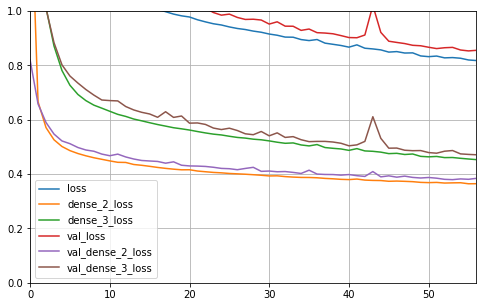

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [8]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],
               [y_test, y_test])

5160/5160 [==============================] - 0s 43us/sample - loss: 0.8420 - dense_2_loss: 0.3808 - dense_3_loss: 0.4611


[0.8419654707575953, 0.3808211, 0.46114436]